In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import squarify

In [2]:
georgia = pd.read_csv('Georgia_all_data.csv')

In [3]:
georgia = georgia[['Amenities','Num_units', 'Num_studio', 'Num_1_bed', 'Num_2_bed','Num_3_bed', 'Num_4_bed', 'Price_per_sqft','treasury_rate']]

In [4]:
georgia.head(3)

,Amenities,Num_units,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft,treasury_rate
0,"Business Center, Controlled Access, Clubhouse,...",210,NaN,75.0,98.0,37.0,NaN,180.16,2.26
1,"Business Center, Controlled Access, Clubhouse,...",210,NaN,75.0,98.0,37.0,NaN,142.98,NaN
2,NaN,264,5.0,98.0,131.0,30.0,NaN,NaN,NaN


In [5]:
georgia.insert(2, 'percent_1', georgia['Num_1_bed']/georgia['Num_units'], True)
georgia.insert(2, 'percent_2', georgia['Num_2_bed']/georgia['Num_units'], True)
georgia.insert(2, 'percent_3', georgia['Num_3_bed']/georgia['Num_units'], True)
georgia.insert(2, 'percent_4', georgia['Num_4_bed']/georgia['Num_units'], True)
georgia.insert(2, 'percent_studio', georgia['Num_studio']/georgia['Num_units'], True)

In [6]:
georgia = georgia[georgia.Price_per_sqft > 0]
georgia = georgia[georgia.Price_per_sqft < 5000]

georgia.count()

Amenities         1669
Num_units         1760
percent_studio     127
percent_4          158
percent_3         1255
percent_2         1710
percent_1         1515
Num_studio         127
Num_1_bed         1515
Num_2_bed         1710
Num_3_bed         1255
Num_4_bed          158
Price_per_sqft    1760
treasury_rate     1748
dtype: int64

In [7]:
georgia['percent_4'].fillna(0, inplace=True)
georgia['percent_3'].fillna(0, inplace=True)
georgia['percent_2'].fillna(0, inplace=True)
georgia['percent_3'].fillna(0, inplace=True)
georgia['percent_studio'].fillna(0, inplace=True)
georgia = georgia.reset_index(drop=True)

georgia.head(3)

,Amenities,Num_units,percent_studio,percent_4,percent_3,percent_2,percent_1,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft,treasury_rate
0,"Business Center, Controlled Access, Clubhouse,...",210,0.000000,0.0,0.17619,0.466667,0.357143,NaN,75.0,98.0,37.0,NaN,180.16,2.26
1,"Business Center, Controlled Access, Clubhouse,...",210,0.000000,0.0,0.17619,0.466667,0.357143,NaN,75.0,98.0,37.0,NaN,142.98,NaN
2,"Controlled Access, Laundry Facilities, Propert...",129,0.612403,0.0,0.00000,0.000000,0.387597,79.0,50.0,NaN,NaN,NaN,4.62,1.66


In [8]:
def giscategory(unit_mix):  
    if georgia.percent_1[unit_mix] > 0.45:
        return 'Mainly 1'
    elif georgia.percent_2[unit_mix] > 0.45:
        return 'Mainly 2'
    elif georgia.percent_3[unit_mix] > 0.45:
        return 'Mainly 3'
    elif georgia.percent_4[unit_mix] > 0.45:
        return 'Mainly 4'
    elif georgia.percent_studio[unit_mix] > 0.45:
        return 'Mainly Studio'
    else:
        return 'Mixed'

In [9]:
georgia['unit_mix'] = np.arange(len(georgia))
georgia['unit_mix'] = georgia['unit_mix'].apply(giscategory)

In [10]:
georgia.head()

,Amenities,Num_units,percent_studio,percent_4,percent_3,percent_2,percent_1,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft,treasury_rate,unit_mix
0,"Business Center, Controlled Access, Clubhouse,...",210,0.000000,0.0,0.176190,0.466667,0.357143,NaN,75.0,98.0,37.0,NaN,180.16,2.26,Mainly 2
1,"Business Center, Controlled Access, Clubhouse,...",210,0.000000,0.0,0.176190,0.466667,0.357143,NaN,75.0,98.0,37.0,NaN,142.98,NaN,Mainly 2
2,"Controlled Access, Laundry Facilities, Propert...",129,0.612403,0.0,0.000000,0.000000,0.387597,79.0,50.0,NaN,NaN,NaN,4.62,1.66,Mainly Studio
3,"Controlled Access, Clubhouse, Fitness Center, ...",197,0.197970,0.0,0.000000,0.172589,0.629442,39.0,124.0,34.0,NaN,NaN,104.58,1.51,Mainly 1
4,Controlled Access,146,0.404110,0.0,0.232877,0.219178,0.143836,59.0,21.0,32.0,34.0,NaN,421.46,NaN,Mixed


In [11]:
g1 = pd.DataFrame(list(zip(georgia.Amenities,georgia.unit_mix, georgia.treasury_rate, georgia.Price_per_sqft)), 
                  columns = ['Amenities','Unit_mix','Treasury_rate','Price_per_sqft'])
g1.head()

,Amenities,Unit_mix,Treasury_rate,Price_per_sqft
0,"Business Center, Controlled Access, Clubhouse,...",Mainly 2,2.26,180.16
1,"Business Center, Controlled Access, Clubhouse,...",Mainly 2,NaN,142.98
2,"Controlled Access, Laundry Facilities, Propert...",Mainly Studio,1.66,4.62
3,"Controlled Access, Clubhouse, Fitness Center, ...",Mainly 1,1.51,104.58
4,Controlled Access,Mixed,NaN,421.46


In [12]:
g1 = g1.dropna(axis=0)
g1.Amenities

0       Business Center, Controlled Access, Clubhouse,...
2       Controlled Access, Laundry Facilities, Propert...
3       Controlled Access, Clubhouse, Fitness Center, ...
6       Business Center, Clubhouse, Fitness Center, La...
7       Business Center, Clubhouse, Fitness Center, La...
                              ...                        
1755    Controlled Access, Laundry Facilities, Gated, ...
1756      Gated, Furnished Units Available, Pet Play Area
1757    Business Center, Fitness Center, Playground, P...
1758    Business Center, Controlled Access, Clubhouse,...
1759    Business Center, Controlled Access, Clubhouse,...
Name: Amenities, Length: 1658, dtype: object

In [13]:
g1.Treasury_rate = round(g1.Treasury_rate)

In [14]:
florida = pd.read_csv('Florida_all_data.csv')

In [15]:
florida = florida[['Amenities','Num_units', 'Num_studio', 'Num_1_bed', 'Num_2_bed','Num_3_bed', 'Num_4_bed', 'Price_per_sqft','treasury_rate']]

In [16]:
florida.insert(2, 'percent_1', florida['Num_1_bed']/florida['Num_units'], True)
florida.insert(2, 'percent_2', florida['Num_2_bed']/florida['Num_units'], True)
florida.insert(2, 'percent_3', florida['Num_3_bed']/florida['Num_units'], True)
florida.insert(2, 'percent_4', florida['Num_4_bed']/florida['Num_units'], True)
florida.insert(2, 'percent_studio', florida['Num_studio']/florida['Num_units'], True)

In [17]:
florida = florida[florida.Price_per_sqft > 0]
florida = florida[florida.Price_per_sqft < 5000]

florida.count()

Amenities         2633
Num_units         2908
percent_studio     363
percent_4          211
percent_3         1767
percent_2         2612
percent_1         2471
Num_studio         363
Num_1_bed         2471
Num_2_bed         2612
Num_3_bed         1767
Num_4_bed          211
Price_per_sqft    2908
treasury_rate     2879
dtype: int64

In [18]:
florida['percent_4'].fillna(0, inplace=True)
florida['percent_3'].fillna(0, inplace=True)
florida['percent_2'].fillna(0, inplace=True)
florida['percent_3'].fillna(0, inplace=True)
florida['percent_studio'].fillna(0, inplace=True)
florida = florida.reset_index(drop=True)

florida.head(3)

,Amenities,Num_units,percent_studio,percent_4,percent_3,percent_2,percent_1,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft,treasury_rate
0,"Clubhouse, Fitness Center, Laundry Facilities,...",309,0.003236,0.0,0.000000,0.291262,0.705502,1.0,218.0,90.0,NaN,NaN,277.96,2.54
1,"Business Center, Courtyard, Fitness Center, Gr...",326,0.110429,0.0,0.021472,0.380368,0.487730,36.0,159.0,124.0,7.0,NaN,152.81,2.30
2,"Business Center, Courtyard, Fitness Center, Gr...",326,0.110429,0.0,0.021472,0.380368,0.487730,36.0,159.0,124.0,7.0,NaN,56.01,2.30


In [19]:
def fiscategory(unit_mix):  
    if florida.percent_1[unit_mix] > 0.45:
        return 'Mainly 1'
    elif florida.percent_2[unit_mix] > 0.45:
        return 'Mainly 2'
    elif florida.percent_3[unit_mix] > 0.45:
        return 'Mainly 3'
    elif florida.percent_4[unit_mix] > 0.45:
        return 'Mainly 4'
    elif florida.percent_studio[unit_mix] > 0.45:
        return 'Mainly Studio'
    else:
        return 'Mixed'

In [20]:
florida['unit_mix'] = np.arange(len(florida))
florida['unit_mix'] = florida['unit_mix'].apply(fiscategory)

In [21]:
f1 = pd.DataFrame(list(zip(florida.Amenities,florida.unit_mix, florida.treasury_rate, florida.Price_per_sqft)), 
                  columns = ['Amenities','Unit_mix','Treasury_rate','Price_per_sqft'])
f1.head()

,Amenities,Unit_mix,Treasury_rate,Price_per_sqft
0,"Clubhouse, Fitness Center, Laundry Facilities,...",Mainly 1,2.54,277.96
1,"Business Center, Courtyard, Fitness Center, Gr...",Mainly 1,2.30,152.81
2,"Business Center, Courtyard, Fitness Center, Gr...",Mainly 1,2.30,56.01
3,"Fitness Center, Laundry Facilities, Gated, Gam...",Mainly 1,3.53,52.06
4,"Business Center, Clubhouse, Fitness Center, El...",Mixed,2.54,354.79


In [22]:
f1 = f1.dropna(axis=0)
f1.Amenities

0       Clubhouse, Fitness Center, Laundry Facilities,...
1       Business Center, Courtyard, Fitness Center, Gr...
2       Business Center, Courtyard, Fitness Center, Gr...
3       Fitness Center, Laundry Facilities, Gated, Gam...
4       Business Center, Clubhouse, Fitness Center, El...
                              ...                        
2903    24 Hour Access, Laundry Facilities, Laundry Se...
2904                                  Fitness Center, Spa
2905    24 Hour Access, Clubhouse, Laundry Facilities,...
2906    Business Center, Clubhouse, Day Care, Fitness ...
2907    Business Center, Clubhouse, Day Care, Fitness ...
Name: Amenities, Length: 2605, dtype: object

In [23]:
f1.Treasury_rate = round(f1.Treasury_rate)

In [24]:
texas = pd.read_csv('Texas_all_data.csv')

In [25]:
texas = texas[['Amenities','Num_units', 'Num_studio', 'Num_1_bed', 'Num_2_bed','Num_3_bed', 'Num_4_bed', 'Price_per_sqft','treasury_rate']]

In [26]:
texas.insert(2, 'percent_1', texas['Num_1_bed']/texas['Num_units'], True)
texas.insert(2, 'percent_2', texas['Num_2_bed']/texas['Num_units'], True)
texas.insert(2, 'percent_3', texas['Num_3_bed']/texas['Num_units'], True)
texas.insert(2, 'percent_4', texas['Num_4_bed']/texas['Num_units'], True)
texas.insert(2, 'percent_studio', texas['Num_studio']/texas['Num_units'], True)

In [27]:
texas = texas[texas.Price_per_sqft > 0]
texas = texas[texas.Price_per_sqft < 5000]

texas.count()

Amenities         2134
Num_units         2165
percent_studio     239
percent_4           93
percent_3         1210
percent_2         2127
percent_1         2104
Num_studio         239
Num_1_bed         2104
Num_2_bed         2127
Num_3_bed         1210
Num_4_bed           93
Price_per_sqft    2165
treasury_rate     2141
dtype: int64

In [28]:
texas['percent_4'].fillna(0, inplace=True)
texas['percent_3'].fillna(0, inplace=True)
texas['percent_2'].fillna(0, inplace=True)
texas['percent_3'].fillna(0, inplace=True)
texas['percent_studio'].fillna(0, inplace=True)
texas = texas.reset_index(drop=True)

texas.head(3)

,Amenities,Num_units,percent_studio,percent_4,percent_3,percent_2,percent_1,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft,treasury_rate
0,"Controlled Access, Fitness Center, Laundry Fac...",102,0.0,0.000000,0.068627,0.215686,0.715686,NaN,73.0,22.0,7.0,NaN,175.00,2.60
1,Laundry Facilities,102,0.0,0.000000,0.098039,0.666667,0.235294,NaN,24.0,68.0,10.0,NaN,37.04,2.25
2,"Controlled Access, Fenced Lot, Laundry Facilit...",107,0.0,0.009346,0.261682,0.373832,0.355140,NaN,38.0,40.0,28.0,1.0,51.84,2.35


In [29]:
def tiscategory(unit_mix):  
    if texas.percent_1[unit_mix] > 0.45:
        return 'Mainly 1'
    elif texas.percent_2[unit_mix] > 0.45:
        return 'Mainly 2'
    elif texas.percent_3[unit_mix] > 0.45:
        return 'Mainly 3'
    elif texas.percent_4[unit_mix] > 0.45:
        return 'Mainly 4'
    elif texas.percent_studio[unit_mix] > 0.45:
        return 'Mainly Studio'
    else:
        return 'Mixed'

In [30]:
texas['unit_mix'] = np.arange(len(texas))
texas['unit_mix'] = texas['unit_mix'].apply(tiscategory)

In [31]:
t1 = pd.DataFrame(list(zip(texas.Amenities,texas.unit_mix, texas.treasury_rate, texas.Price_per_sqft)), 
                  columns = ['Amenities','Unit_mix','Treasury_rate','Price_per_sqft'])
t1.head()

,Amenities,Unit_mix,Treasury_rate,Price_per_sqft
0,"Controlled Access, Fitness Center, Laundry Fac...",Mainly 1,2.60,175.00
1,Laundry Facilities,Mainly 2,2.25,37.04
2,"Controlled Access, Fenced Lot, Laundry Facilit...",Mixed,2.35,51.84
3,"Controlled Access, Fenced Lot, Laundry Facilit...",Mixed,2.35,51.84
4,"24 Hour Access, Laundry Facilities, Property M...",Mainly 1,2.63,73.30


In [32]:
t1 = t1.dropna(axis=0)
t1.Amenities

0       Controlled Access, Fitness Center, Laundry Fac...
1                                      Laundry Facilities
2       Controlled Access, Fenced Lot, Laundry Facilit...
3       Controlled Access, Fenced Lot, Laundry Facilit...
4       24 Hour Access, Laundry Facilities, Property M...
                              ...                        
2160                 Package Service, Maintenance on site
2161    24 Hour Access, Business Center, Clubhouse, La...
2162    Business Center, Controlled Access, Clubhouse,...
2163    Business Center, Controlled Access, Clubhouse,...
2164    Business Center, Controlled Access, Clubhouse,...
Name: Amenities, Length: 2111, dtype: object

In [33]:
t1.Treasury_rate = round(t1.Treasury_rate)

In [34]:
nc = pd.read_csv('North_Carolina_all_data.csv')

In [35]:
nc = nc[['Amenities','Num_units', 'Num_studio', 'Num_1_bed', 'Num_2_bed','Num_3_bed', 'Num_4_bed', 'Price_per_sqft','treasury_rate']]

In [36]:
nc.insert(2, 'percent_1', nc['Num_1_bed']/nc['Num_units'], True)
nc.insert(2, 'percent_2', nc['Num_2_bed']/nc['Num_units'], True)
nc.insert(2, 'percent_3', nc['Num_3_bed']/nc['Num_units'], True)
nc.insert(2, 'percent_4', nc['Num_4_bed']/nc['Num_units'], True)
nc.insert(2, 'percent_studio', nc['Num_studio']/nc['Num_units'], True)

In [37]:
nc = nc[nc.Price_per_sqft > 0]
nc = nc[nc.Price_per_sqft < 5000]

nc.count()

Amenities          996
Num_units         1037
percent_studio     115
percent_4           51
percent_3          719
percent_2         1010
percent_1          944
Num_studio         115
Num_1_bed          944
Num_2_bed         1010
Num_3_bed          719
Num_4_bed           51
Price_per_sqft    1037
treasury_rate     1024
dtype: int64

In [38]:
nc['percent_4'].fillna(0, inplace=True)
nc['percent_3'].fillna(0, inplace=True)
nc['percent_2'].fillna(0, inplace=True)
nc['percent_3'].fillna(0, inplace=True)
nc['percent_studio'].fillna(0, inplace=True)
nc = nc.reset_index(drop=True)

nc.head(3)

,Amenities,Num_units,percent_studio,percent_4,percent_3,percent_2,percent_1,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft,treasury_rate
0,"Business Center, Laundry Facilities",108,0.0,0.0,0.166667,0.462963,0.37037,NaN,40.0,50.0,18.0,NaN,44.18,2.00
1,"Controlled Access, Clubhouse, Fitness Center, ...",120,0.0,0.0,0.000000,0.600000,0.40000,NaN,48.0,72.0,NaN,NaN,182.58,1.68
2,"Controlled Access, Clubhouse, Fitness Center, ...",120,0.0,0.0,0.000000,0.600000,0.40000,NaN,48.0,72.0,NaN,NaN,142.45,1.59


In [39]:
def nciscategory(unit_mix):  
    if nc.percent_1[unit_mix] > 0.45:
        return 'Mainly 1'
    elif nc.percent_2[unit_mix] > 0.45:
        return 'Mainly 2'
    elif nc.percent_3[unit_mix] > 0.45:
        return 'Mainly 3'
    elif nc.percent_4[unit_mix] > 0.45:
        return 'Mainly 4'
    elif nc.percent_studio[unit_mix] > 0.45:
        return 'Mainly Studio'
    else:
        return 'Mixed'

In [40]:
nc['unit_mix'] = np.arange(len(nc))
nc['unit_mix'] = nc['unit_mix'].apply(nciscategory)

In [41]:
nc1 = pd.DataFrame(list(zip(nc.Amenities,nc.unit_mix,nc.treasury_rate, nc.Price_per_sqft)), 
                  columns = ['Amenities','Unit_mix','Treasury_rate','Price_per_sqft'])
nc1.head()

,Amenities,Unit_mix,Treasury_rate,Price_per_sqft
0,"Business Center, Laundry Facilities",Mainly 2,2.00,44.18
1,"Controlled Access, Clubhouse, Fitness Center, ...",Mainly 2,1.68,182.58
2,"Controlled Access, Clubhouse, Fitness Center, ...",Mainly 2,1.59,142.45
3,"Clubhouse, Fitness Center, Picnic Area, Playgr...",Mixed,3.93,56.45
4,"Clubhouse, Fitness Center, Picnic Area, Playgr...",Mixed,1.53,53.13


In [42]:
nc1 = nc1.dropna(axis=0)
nc1.Amenities

0                     Business Center, Laundry Facilities
1       Controlled Access, Clubhouse, Fitness Center, ...
2       Controlled Access, Clubhouse, Fitness Center, ...
3       Clubhouse, Fitness Center, Picnic Area, Playgr...
4       Clubhouse, Fitness Center, Picnic Area, Playgr...
                              ...                        
1032    Business Center, Clubhouse, Courtyard, Fitness...
1033    24 Hour Access, Business Center, Clubhouse, Fi...
1034    Clubhouse, Fitness Center, Playground, Propert...
1035    Clubhouse, Fitness Center, Playground, Propert...
1036    Clubhouse, Fitness Center, Playground, Propert...
Name: Amenities, Length: 984, dtype: object

In [53]:
val = nc1.Amenities.tolist()
val = str(val)
tokens = val.split(',')

tokens

["['Business Center",
 " Laundry Facilities'",
 " 'Controlled Access",
 ' Clubhouse',
 ' Fitness Center',
 ' Laundry Facilities',
 ' Property Manager on Site',
 " Car Wash Area'",
 " 'Controlled Access",
 ' Clubhouse',
 ' Fitness Center',
 ' Laundry Facilities',
 ' Property Manager on Site',
 " Car Wash Area'",
 " 'Clubhouse",
 ' Fitness Center',
 ' Picnic Area',
 ' Playground',
 ' Property Manager on Site',
 ' Tennis Court',
 ' Basketball Court',
 ' Furnished Units Available',
 ' Grill',
 ' Maid Service',
 ' Package Service',
 ' Storage Space',
 ' House Sitter Services',
 ' Maintenance on site',
 ' Pet Care',
 " Sundeck'",
 " 'Clubhouse",
 ' Fitness Center',
 ' Picnic Area',
 ' Playground',
 ' Property Manager on Site',
 ' Tennis Court',
 ' Basketball Court',
 ' Furnished Units Available',
 ' Grill',
 ' Maid Service',
 ' Package Service',
 ' Storage Space',
 ' House Sitter Services',
 ' Maintenance on site',
 ' Pet Care',
 " Sundeck'",
 " 'Laundry Facilities'",
 " 'Property Manager on

In [59]:
def unique(tokens): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in tokens: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    for x in unique_list: 
        print (x) 
        
        

print("the unique values from 1st list is") 
unique(tokens) 

the unique values from 1st list is
['Business Center
 Laundry Facilities'
 'Controlled Access
 Clubhouse
 Fitness Center
 Laundry Facilities
 Property Manager on Site
 Car Wash Area'
 'Clubhouse
 Picnic Area
 Playground
 Tennis Court
 Basketball Court
 Furnished Units Available
 Grill
 Maid Service
 Package Service
 Storage Space
 House Sitter Services
 Maintenance on site
 Pet Care
 Sundeck'
 'Laundry Facilities'
 'Property Manager on Site
 Pet Play Area'
 Car Wash Area
 Dry Cleaning Service
 Planned Social Activities
 Recycling'
 Grill'
 'Fitness Center
 'Laundry Facilities
 Trash Pickup - Curbside
 Maintenance on site'
 'Fitness Center'
 Laundry Service
 Pet Play Area
 '24 Hour Access
 Sauna
 Gated
 Gameroom
 'Business Center
 Pool
 Property Manager on Site'
 Breakfast/Coffee Concierge
 Media Center/Movie Theatre
 Wi-Fi
 Lounge'
 Playground'
 Business Center
 Controlled Access
 Courtyard
 Security System
 Lounge
 Online Services
 Planned Social Activities'
 Trash Pickup - Door to Do

In [43]:
nc1.Treasury_rate = round(nc1.Treasury_rate)

In [60]:
g1['fitnesscenter'] = g1['Amenities'].str.contains(r'Fitness', na=True)
g1['fitnesscenter'] = g1['fitnesscenter'].map({True: 1, False: 0})

g1['businesscenter'] = g1['Amenities'].str.contains(r'Business', na=True)
g1['businesscenter'] = g1['businesscenter'].map({True: 1, False: 0})

g1['laundryfacilities'] = g1['Amenities'].str.contains(r'Laundry', na=True)
g1['laundryfacilities'] = g1['laundryfacilities'].map({True: 1, False: 0})

g1['propertymanager'] = g1['Amenities'].str.contains(r'Manager', na=True)
g1['propertymanager'] = g1['propertymanager'].map({True: 1, False: 0})

g1['controlledaccess'] = g1['Amenities'].str.contains(r'Controlled', na=True)
g1['controlledaccess'] = g1['controlledaccess'].map({True: 1, False: 0})

g1['clubhouse'] = g1['Amenities'].str.contains(r'Clubhouse', na=True)
g1['clubhouse'] = g1['clubhouse'].map({True: 1, False: 0})

g1['carwasharea'] = g1['Amenities'].str.contains(r'Wash', na=True)
g1['carwasharea'] = g1['carwasharea'].map({True: 1, False: 0})

g1['picnicarea'] = g1['Amenities'].str.contains(r'Picnic', na=True)
g1['picnicarea'] = g1['picnicarea'].map({True: 1, False: 0})

g1['playground'] = g1['Amenities'].str.contains(r'Playground', na=True)
g1['playground'] = g1['playground'].map({True: 1, False: 0})

g1['tenniscourt'] = g1['Amenities'].str.contains(r'Tennis', na=True)
g1['tenniscourt'] = g1['tenniscourt'].map({True: 1, False: 0})

g1['basketball'] = g1['Amenities'].str.contains(r'Basketball', na=True)
g1['basketball'] = g1['basketball'].map({True: 1, False: 0})

g1['grill'] = g1['Amenities'].str.contains(r'Grill', na=True)
g1['grill'] = g1['grill'].map({True: 1, False: 0})

g1['package'] = g1['Amenities'].str.contains(r'Package', na=True)
g1['package'] = g1['package'].map({True: 1, False: 0})

g1['storage'] = g1['Amenities'].str.contains(r'Storage', na=True)
g1['storage'] = g1['storage'].map({True: 1, False: 0})

g1['package'] = g1['Amenities'].str.contains(r'Package', na=True)
g1['package'] = g1['package'].map({True: 1, False: 0})

g1['pet'] = g1['Amenities'].str.contains(r'Pet', na=True)
g1['pet'] = g1['pet'].map({True: 1, False: 0})

g1['sun'] = g1['Amenities'].str.contains(r'Sundeck', na=True)
g1['sun'] = g1['sun'].map({True: 1, False: 0})

g1['trash'] = g1['Amenities'].str.contains(r'Trash', na=True)
g1['trash'] = g1['trash'].map({True: 1, False: 0})

g1['hour'] = g1['Amenities'].str.contains(r'Hour', na=True)
g1['hour'] = g1['hour'].map({True: 1, False: 0})

g1['wifi'] = g1['Amenities'].str.contains(r'wifi', na=True)
g1['wifi'] = g1['wifi'].map({True: 1, False: 0})

g1['elevator'] = g1['Amenities'].str.contains(r'Elevator', na=True)
g1['elevator'] = g1['elevator'].map({True: 1, False: 0})

In [61]:
f1['fitnesscenter'] = f1['Amenities'].str.contains(r'Fitness', na=True)
f1['fitnesscenter'] = f1['fitnesscenter'].map({True: 1, False: 0})

f1['businesscenter'] = f1['Amenities'].str.contains(r'Business', na=True)
f1['businesscenter'] = f1['businesscenter'].map({True: 1, False: 0})

f1['laundryfacilities'] = f1['Amenities'].str.contains(r'Laundry', na=True)
f1['laundryfacilities'] = f1['laundryfacilities'].map({True: 1, False: 0})

f1['propertymanager'] = f1['Amenities'].str.contains(r'Manager', na=True)
f1['propertymanager'] = f1['propertymanager'].map({True: 1, False: 0})

f1['controlledaccess'] = f1['Amenities'].str.contains(r'Controlled', na=True)
f1['controlledaccess'] = f1['controlledaccess'].map({True: 1, False: 0})

f1['clubhouse'] = f1['Amenities'].str.contains(r'Clubhouse', na=True)
f1['clubhouse'] = f1['clubhouse'].map({True: 1, False: 0})

f1['carwasharea'] = f1['Amenities'].str.contains(r'Wash', na=True)
f1['carwasharea'] = f1['carwasharea'].map({True: 1, False: 0})

f1['picnicarea'] = f1['Amenities'].str.contains(r'Picnic', na=True)
f1['picnicarea'] = f1['picnicarea'].map({True: 1, False: 0})

f1['playground'] = f1['Amenities'].str.contains(r'Playground', na=True)
f1['playground'] = f1['playground'].map({True: 1, False: 0})

f1['tenniscourt'] = f1['Amenities'].str.contains(r'Tennis', na=True)
f1['tenniscourt'] = f1['tenniscourt'].map({True: 1, False: 0})

f1['basketball'] = f1['Amenities'].str.contains(r'Basketball', na=True)
f1['basketball'] = f1['basketball'].map({True: 1, False: 0})

f1['grill'] = f1['Amenities'].str.contains(r'Grill', na=True)
f1['grill'] = f1['grill'].map({True: 1, False: 0})

f1['package'] = f1['Amenities'].str.contains(r'Package', na=True)
f1['package'] = f1['package'].map({True: 1, False: 0})

f1['storage'] = f1['Amenities'].str.contains(r'Storage', na=True)
f1['storage'] = f1['storage'].map({True: 1, False: 0})

f1['package'] = f1['Amenities'].str.contains(r'Package', na=True)
f1['package'] = f1['package'].map({True: 1, False: 0})

f1['pet'] = f1['Amenities'].str.contains(r'Pet', na=True)
f1['pet'] = f1['pet'].map({True: 1, False: 0})

f1['sun'] = f1['Amenities'].str.contains(r'Sundeck', na=True)
f1['sun'] = f1['sun'].map({True: 1, False: 0})

f1['trash'] = f1['Amenities'].str.contains(r'Trash', na=True)
f1['trash'] = f1['trash'].map({True: 1, False: 0})

f1['hour'] = f1['Amenities'].str.contains(r'Hour', na=True)
f1['hour'] = f1['hour'].map({True: 1, False: 0})

f1['wifi'] = f1['Amenities'].str.contains(r'wifi', na=True)
f1['wifi'] = f1['wifi'].map({True: 1, False: 0})

f1['elevator'] = f1['Amenities'].str.contains(r'Elevator', na=True)
f1['elevator'] = f1['elevator'].map({True: 1, False: 0})

In [62]:
t1['fitnesscenter'] = t1['Amenities'].str.contains(r'Fitness', na=True)
t1['fitnesscenter'] = t1['fitnesscenter'].map({True: 1, False: 0})

t1['businesscenter'] = t1['Amenities'].str.contains(r'Business', na=True)
t1['businesscenter'] = t1['businesscenter'].map({True: 1, False: 0})

t1['laundryfacilities'] = t1['Amenities'].str.contains(r'Laundry', na=True)
t1['laundryfacilities'] = t1['laundryfacilities'].map({True: 1, False: 0})

t1['propertymanager'] = t1['Amenities'].str.contains(r'Manager', na=True)
t1['propertymanager'] = t1['propertymanager'].map({True: 1, False: 0})
t1['controlledaccess'] = t1['Amenities'].str.contains(r'Controlled', na=True)
t1['controlledaccess'] = t1['controlledaccess'].map({True: 1, False: 0})

t1['clubhouse'] = t1['Amenities'].str.contains(r'Clubhouse', na=True)
t1['clubhouse'] = t1['clubhouse'].map({True: 1, False: 0})

t1['carwasharea'] = t1['Amenities'].str.contains(r'Wash', na=True)
t1['carwasharea'] = t1['carwasharea'].map({True: 1, False: 0})

t1['picnicarea'] = t1['Amenities'].str.contains(r'Picnic', na=True)
t1['picnicarea'] = t1['picnicarea'].map({True: 1, False: 0})

t1['playground'] = t1['Amenities'].str.contains(r'Playground', na=True)
t1['playground'] = t1['playground'].map({True: 1, False: 0})

t1['tenniscourt'] = t1['Amenities'].str.contains(r'Tennis', na=True)
t1['tenniscourt'] = t1['tenniscourt'].map({True: 1, False: 0})

t1['basketball'] = t1['Amenities'].str.contains(r'Basketball', na=True)
t1['basketball'] = t1['basketball'].map({True: 1, False: 0})

t1['grill'] = t1['Amenities'].str.contains(r'Grill', na=True)
t1['grill'] = t1['grill'].map({True: 1, False: 0})

t1['package'] = t1['Amenities'].str.contains(r'Package', na=True)
t1['package'] = t1['package'].map({True: 1, False: 0})

t1['storage'] = t1['Amenities'].str.contains(r'Storage', na=True)
t1['storage'] = t1['storage'].map({True: 1, False: 0})

t1['package'] = t1['Amenities'].str.contains(r'Package', na=True)
t1['package'] = t1['package'].map({True: 1, False: 0})

t1['pet'] = t1['Amenities'].str.contains(r'Pet', na=True)
t1['pet'] = t1['pet'].map({True: 1, False: 0})

t1['sun'] = t1['Amenities'].str.contains(r'Sundeck', na=True)
t1['sun'] = t1['sun'].map({True: 1, False: 0})

t1['trash'] = t1['Amenities'].str.contains(r'Trash', na=True)
t1['trash'] = t1['trash'].map({True: 1, False: 0})

t1['hour'] = t1['Amenities'].str.contains(r'Hour', na=True)
t1['hour'] = t1['hour'].map({True: 1, False: 0})

t1['wifi'] = t1['Amenities'].str.contains(r'wifi', na=True)
t1['wifi'] = t1['wifi'].map({True: 1, False: 0})

t1['elevator'] = t1['Amenities'].str.contains(r'Elevator', na=True)
t1['elevator'] = t1['elevator'].map({True: 1, False: 0})

In [63]:
nc1['fitnesscenter'] = nc1['Amenities'].str.contains(r'Fitness', na=True)
nc1['fitnesscenter'] = nc1['fitnesscenter'].map({True: 1, False: 0})

nc1['businesscenter'] = nc1['Amenities'].str.contains(r'Business', na=True)
nc1['businesscenter'] = nc1['businesscenter'].map({True: 1, False: 0})

nc1['laundryfacilities'] = nc1['Amenities'].str.contains(r'Laundry', na=True)
nc1['laundryfacilities'] = nc1['laundryfacilities'].map({True: 1, False: 0})

nc1['propertymanager'] = nc1['Amenities'].str.contains(r'Manager', na=True)
nc1['propertymanager'] = nc1['propertymanager'].map({True: 1, False: 0})
nc1['controlledaccess'] = nc1['Amenities'].str.contains(r'Controlled', na=True)
nc1['controlledaccess'] = nc1['controlledaccess'].map({True: 1, False: 0})

nc1['clubhouse'] = nc1['Amenities'].str.contains(r'Clubhouse', na=True)
nc1['clubhouse'] = nc1['clubhouse'].map({True: 1, False: 0})

nc1['carwasharea'] = nc1['Amenities'].str.contains(r'Wash', na=True)
nc1['carwasharea'] = nc1['carwasharea'].map({True: 1, False: 0})

nc1['picnicarea'] = nc1['Amenities'].str.contains(r'Picnic', na=True)
nc1['picnicarea'] = nc1['picnicarea'].map({True: 1, False: 0})

nc1['playground'] = nc1['Amenities'].str.contains(r'Playground', na=True)
nc1['playground'] = nc1['playground'].map({True: 1, False: 0})

nc1['tenniscourt'] = nc1['Amenities'].str.contains(r'Tennis', na=True)
nc1['tenniscourt'] = nc1['tenniscourt'].map({True: 1, False: 0})

nc1['basketball'] = nc1['Amenities'].str.contains(r'Basketball', na=True)
nc1['basketball'] = nc1['basketball'].map({True: 1, False: 0})

nc1['grill'] = nc1['Amenities'].str.contains(r'Grill', na=True)
nc1['grill'] = nc1['grill'].map({True: 1, False: 0})

nc1['package'] = nc1['Amenities'].str.contains(r'Package', na=True)
nc1['package'] = nc1['package'].map({True: 1, False: 0})

nc1['storage'] = nc1['Amenities'].str.contains(r'Storage', na=True)
nc1['storage'] = nc1['storage'].map({True: 1, False: 0})

nc1['package'] = nc1['Amenities'].str.contains(r'Package', na=True)
nc1['package'] = nc1['package'].map({True: 1, False: 0})

nc1['pet'] = nc1['Amenities'].str.contains(r'Pet', na=True)
nc1['pet'] = nc1['pet'].map({True: 1, False: 0})

nc1['sun'] = nc1['Amenities'].str.contains(r'Sundeck', na=True)
nc1['sun'] = nc1['sun'].map({True: 1, False: 0})

nc1['trash'] = nc1['Amenities'].str.contains(r'Trash', na=True)
nc1['trash'] = nc1['trash'].map({True: 1, False: 0})

nc1['hour'] = nc1['Amenities'].str.contains(r'Hour', na=True)
nc1['hour'] = nc1['hour'].map({True: 1, False: 0})

nc1['wifi'] = nc1['Amenities'].str.contains(r'wifi', na=True)
nc1['wifi'] = nc1['wifi'].map({True: 1, False: 0})

nc1['elevator'] = nc1['Amenities'].str.contains(r'Elevator', na=True)
nc1['elevator'] = nc1['elevator'].map({True: 1, False: 0})

In [64]:
f1['keywords']= f1['fitnesscenter']+f1['laundryfacilities']+f1['propertymanager']+f1['businesscenter']+f1['controlledaccess']+f1['clubhouse']+f1['carwasharea']+f1['picnicarea']+f1['playground']+f1['tenniscourt']+f1['basketball']+f1['grill']+f1['package']+f1['storage']+f1['pet']+f1['sun']+f1['trash']+f1['hour']+f1['wifi']+f1['elevator']
g1['keywords']= g1['fitnesscenter']+g1['laundryfacilities']+g1['propertymanager']+g1['businesscenter']+g1['controlledaccess']+g1['clubhouse']+g1['carwasharea']+g1['picnicarea']+g1['playground']+g1['tenniscourt']+g1['basketball']+g1['grill']+g1['package']+g1['storage']+g1['pet']+g1['sun']+g1['trash']+g1['hour']+g1['wifi']+g1['elevator']
t1['keywords']= t1['fitnesscenter']+t1['laundryfacilities']+t1['propertymanager']+t1['businesscenter']+t1['controlledaccess']+t1['clubhouse']+t1['carwasharea']+t1['picnicarea']+t1['playground']+t1['tenniscourt']+t1['basketball']+t1['grill']+t1['package']+t1['storage']+t1['pet']+t1['sun']+t1['trash']+t1['hour']+t1['wifi']+t1['elevator']
nc1['keywords']= nc1['fitnesscenter']+nc1['laundryfacilities']+nc1['propertymanager']+nc1['businesscenter']+nc1['controlledaccess']+nc1['clubhouse']+nc1['carwasharea']+nc1['picnicarea']+nc1['playground']+nc1['tenniscourt']+nc1['basketball']+nc1['grill']+nc1['package']+nc1['storage']+nc1['pet']+nc1['sun']+nc1['trash']+nc1['hour']+nc1['wifi']+nc1['elevator']

<Figure size 864x576 with 0 Axes>

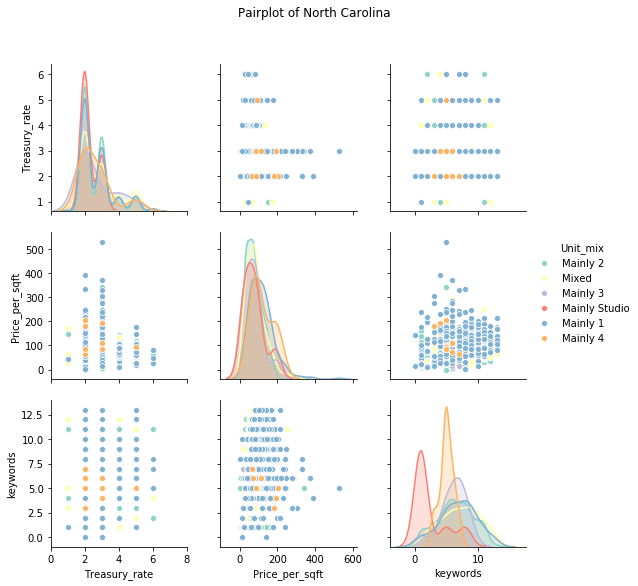

In [65]:
plt.figure(figsize = (12,8))
#kind=reg add regression lines
nc2 = sns.pairplot(nc1,
             x_vars = ['Treasury_rate', 'Price_per_sqft','keywords'],
             y_vars = ['Treasury_rate', 'Price_per_sqft','keywords'],
             hue = 'Unit_mix', palette = 'Set3'
            )
nc2.axes[1,0].set_xlim((0,8))
nc2.fig.suptitle('Pairplot of North Carolina', y=1.08)
plt.savefig('./NorthCarolinaPairplot.jpg')
plt.show()

<Figure size 864x576 with 0 Axes>

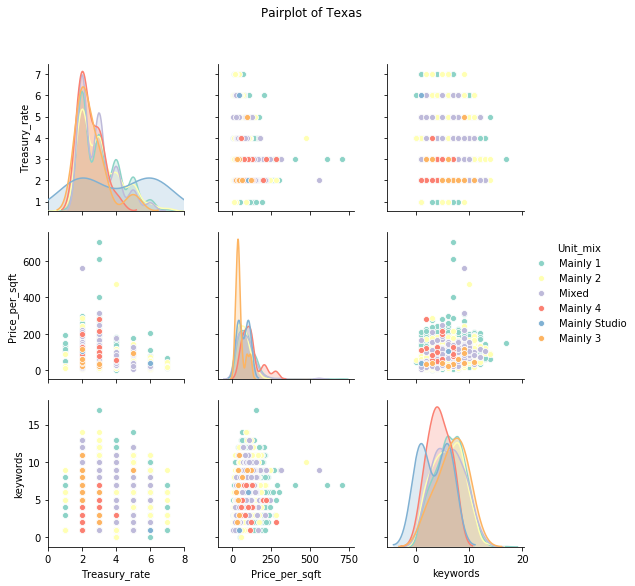

In [66]:
plt.figure(figsize = (12,8))
#kind=reg add regression lines
t2 = sns.pairplot(t1,
             x_vars = ['Treasury_rate', 'Price_per_sqft','keywords'],
             y_vars = ['Treasury_rate', 'Price_per_sqft','keywords'],
             hue = 'Unit_mix', palette = 'Set3'
            )
t2.axes[1,0].set_xlim((0,8))
t2.fig.suptitle('Pairplot of Texas', y=1.08)
plt.savefig('./TexasPairplot.jpg')
plt.show()

<Figure size 864x576 with 0 Axes>

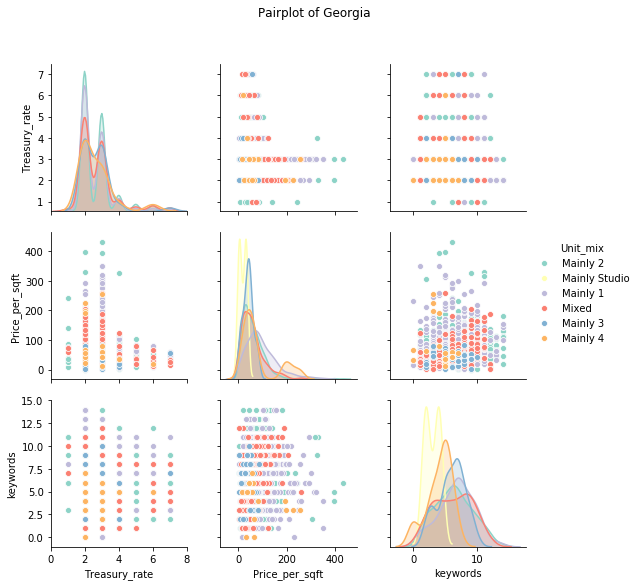

In [67]:
plt.figure(figsize = (12,8))
#kind=reg add regression lines
g2 = sns.pairplot(g1,
             x_vars = ['Treasury_rate', 'Price_per_sqft','keywords'],
             y_vars = ['Treasury_rate', 'Price_per_sqft','keywords'],
             hue = 'Unit_mix', palette = 'Set3'
            )
g2.axes[1,0].set_xlim((0,8))
g2.fig.suptitle('Pairplot of Georgia', y=1.08)
plt.savefig('./GeorgiaPairplot.jpg')
plt.show()

<Figure size 864x576 with 0 Axes>

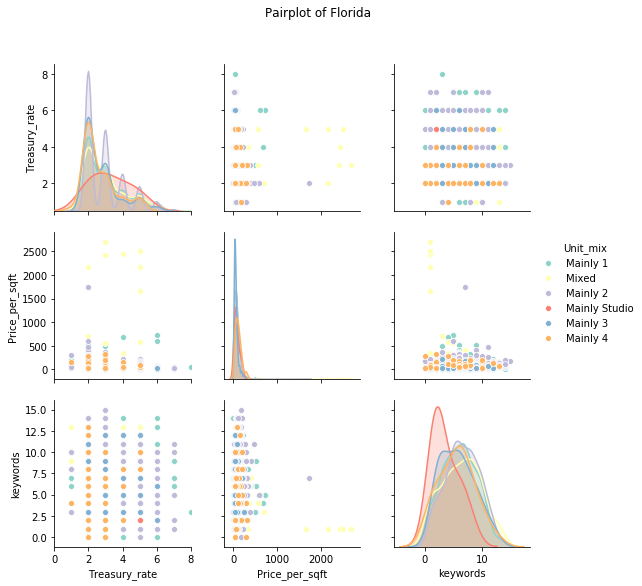

In [68]:
plt.figure(figsize = (12,8))
#kind=reg add regression lines
f2 = sns.pairplot(f1,
             x_vars = ['Treasury_rate', 'Price_per_sqft','keywords'],
             y_vars = ['Treasury_rate', 'Price_per_sqft','keywords'],
             hue = 'Unit_mix', palette = 'Set3'
            )
f2.axes[1,0].set_xlim((0,8))

f2.fig.suptitle('Pairplot of Florida', y=1.08)
plt.savefig('./FloridaPairplot.jpg')
plt.show()